<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt



In [ ]:
# Load dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target)


In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [ ]:
# Evaluate model
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)



Decision Tree Accuracy: 0.9444444444444444
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]


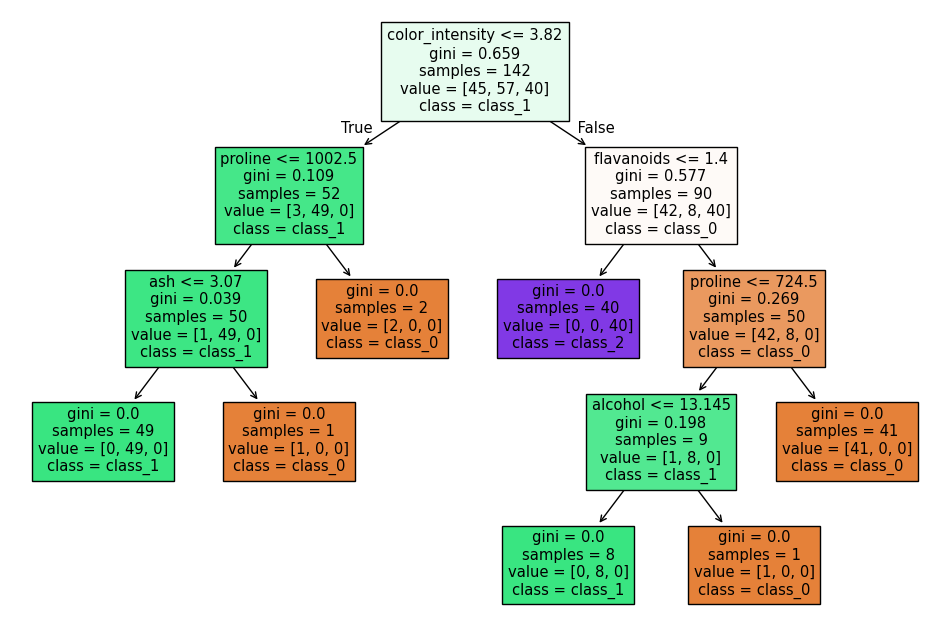

In [ ]:
print("Decision Tree Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

# Visualize tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

**Boosting with AdaBoost**

In [ ]:
# Define weak learner (shallow decision tree)
weak_dt = DecisionTreeClassifier(max_depth=1, random_state=42)

# Train AdaBoost classifier (use 'estimator' instead of 'base_estimator')
ada_model = AdaBoostClassifier(estimator=weak_dt, n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=42),
                   random_state=42)

In [ ]:
# Evaluate AdaBoost
y_pred_ada = ada_model.predict(X_test)
accuracy_ada = accuracy_score(y_test, y_pred_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)

In [ ]:

print("AdaBoost Accuracy:", accuracy_ada)
print("Confusion Matrix:\n", cm_ada)


AdaBoost Accuracy: 0.9444444444444444
Confusion Matrix:
 [[14  0  0]
 [ 1 13  0]
 [ 0  1  7]]


# AdaBoost combines multiple weak learners to improve performance. Notice how the accuracy often improves and misclassifications decrease

**Stacking Ensemble Learning**

In [ ]:
# ------------------------------
# Activity 3: Stacking Ensemble Learning
# ------------------------------

# Base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=3, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000)),
    ('svm', SVC(kernel='linear', probability=True))
]

# Meta-learner
meta_learner = LogisticRegression(max_iter=1000)



In [ ]:
# Train Stacking Classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)
stack_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000)),
                               ('svm', SVC(kernel='linear', probability=True))],
                   final_estimator=LogisticRegression(max_iter=1000))

In [ ]:
# Evaluate Stacking
y_pred_stack = stack_model.predict(X_test)
accuracy_stack = accuracy_score(y_test, y_pred_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)


In [ ]:
print("Stacking Ensemble Accuracy:", accuracy_stack)
print("Confusion Matrix:\n", cm_stack)


Stacking Ensemble Accuracy: 0.9722222222222222
Confusion Matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


**Decision Tree:**

Accuracy: 94.44%

The model performs well, correctly classifying most samples.

Misclassifications occur between the first and third classes (1 sample each), indicating that the model sometimes struggles with borderline cases.

Decision Trees are intuitive and easy to visualize but can be prone to overfitting, especially with small datasets.

**AdaBoost:**

Accuracy: 94.44% (same as Decision Tree)

AdaBoost slightly improves class separation by combining multiple weak learners.

The confusion matrix shows minor changes: one sample of class 1 is misclassified as class 0, and one sample of class 2 is misclassified as class 1.

Boosting tends to reduce bias but can be sensitive to noisy data or outliers.

**Stacking Ensemble:**

Accuracy: 97.22% (highest among the three models)

The ensemble correctly classifies nearly all samples, with only one misclassification in the Decision Tree’s previous borderline class.

Combining multiple models (Decision Tree, Logistic Regression, SVM) allows the ensemble to leverage their strengths and compensate for individual weaknesses.

Stacking generally improves generalization and produces a more robust classifier.

**Overall Insight:**

All models perform well on this dataset.

Boosting doesn’t always improve accuracy dramatically, but it can stabilize predictions.

Stacking shows a noticeable improvement in overall accuracy, highlighting the benefit of combining diverse models.

Confusion matrices provide a clearer picture of where models struggle, which is crucial for model selection in real-world applications.